In [19]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
random_state=0

In [20]:
df= pd.read_csv('Concrete_Data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


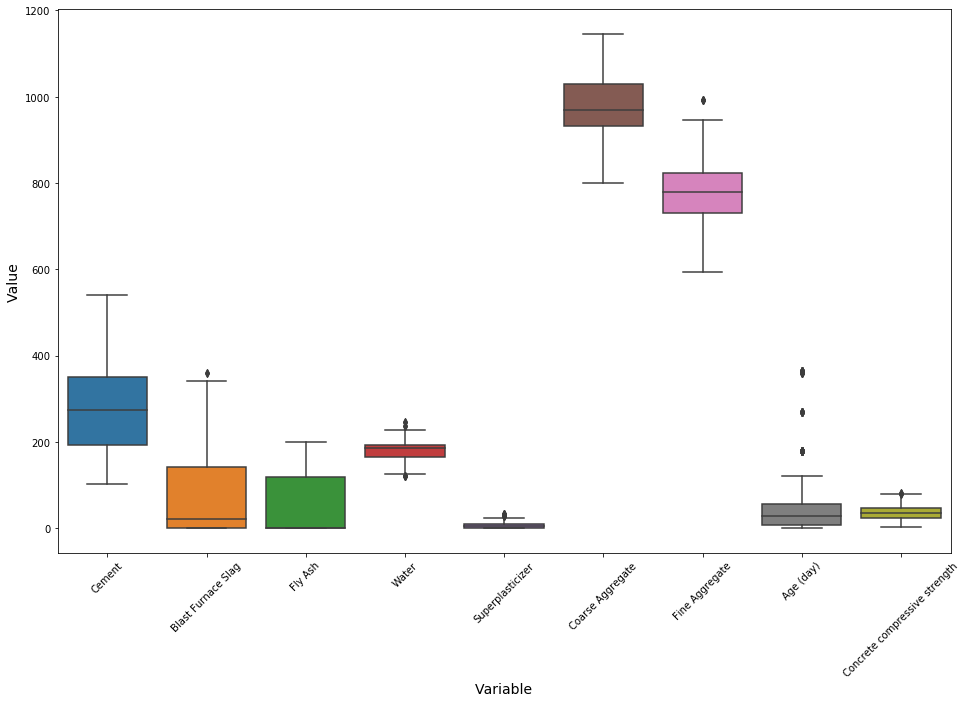

In [31]:
# Assuming df is the DataFrame with the columns
columns = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
           'Coarse Aggregate', 'Fine Aggregate', 'Age (day)',
           'Concrete compressive strength']

# Create a long format DataFrame using melt()
melted_df = pd.melt(df[columns], var_name='Variable', value_name='Value')

# Set the size of the plot
plt.figure(figsize=(16, 10))

# Create boxplots for each variable on one plot
sns.boxplot(x='Variable', y='Value', data=melted_df)

# Set title and label
plt.xlabel('Variable', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)


plt.savefig("concreteboxplots.pdf", bbox_inches="tight")
# Show the plot
plt.show()


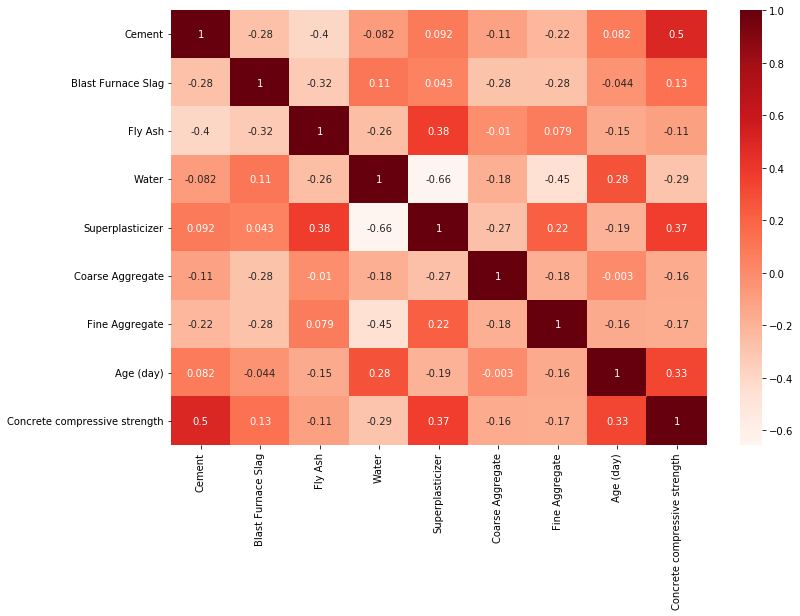

<Figure size 864x576 with 0 Axes>

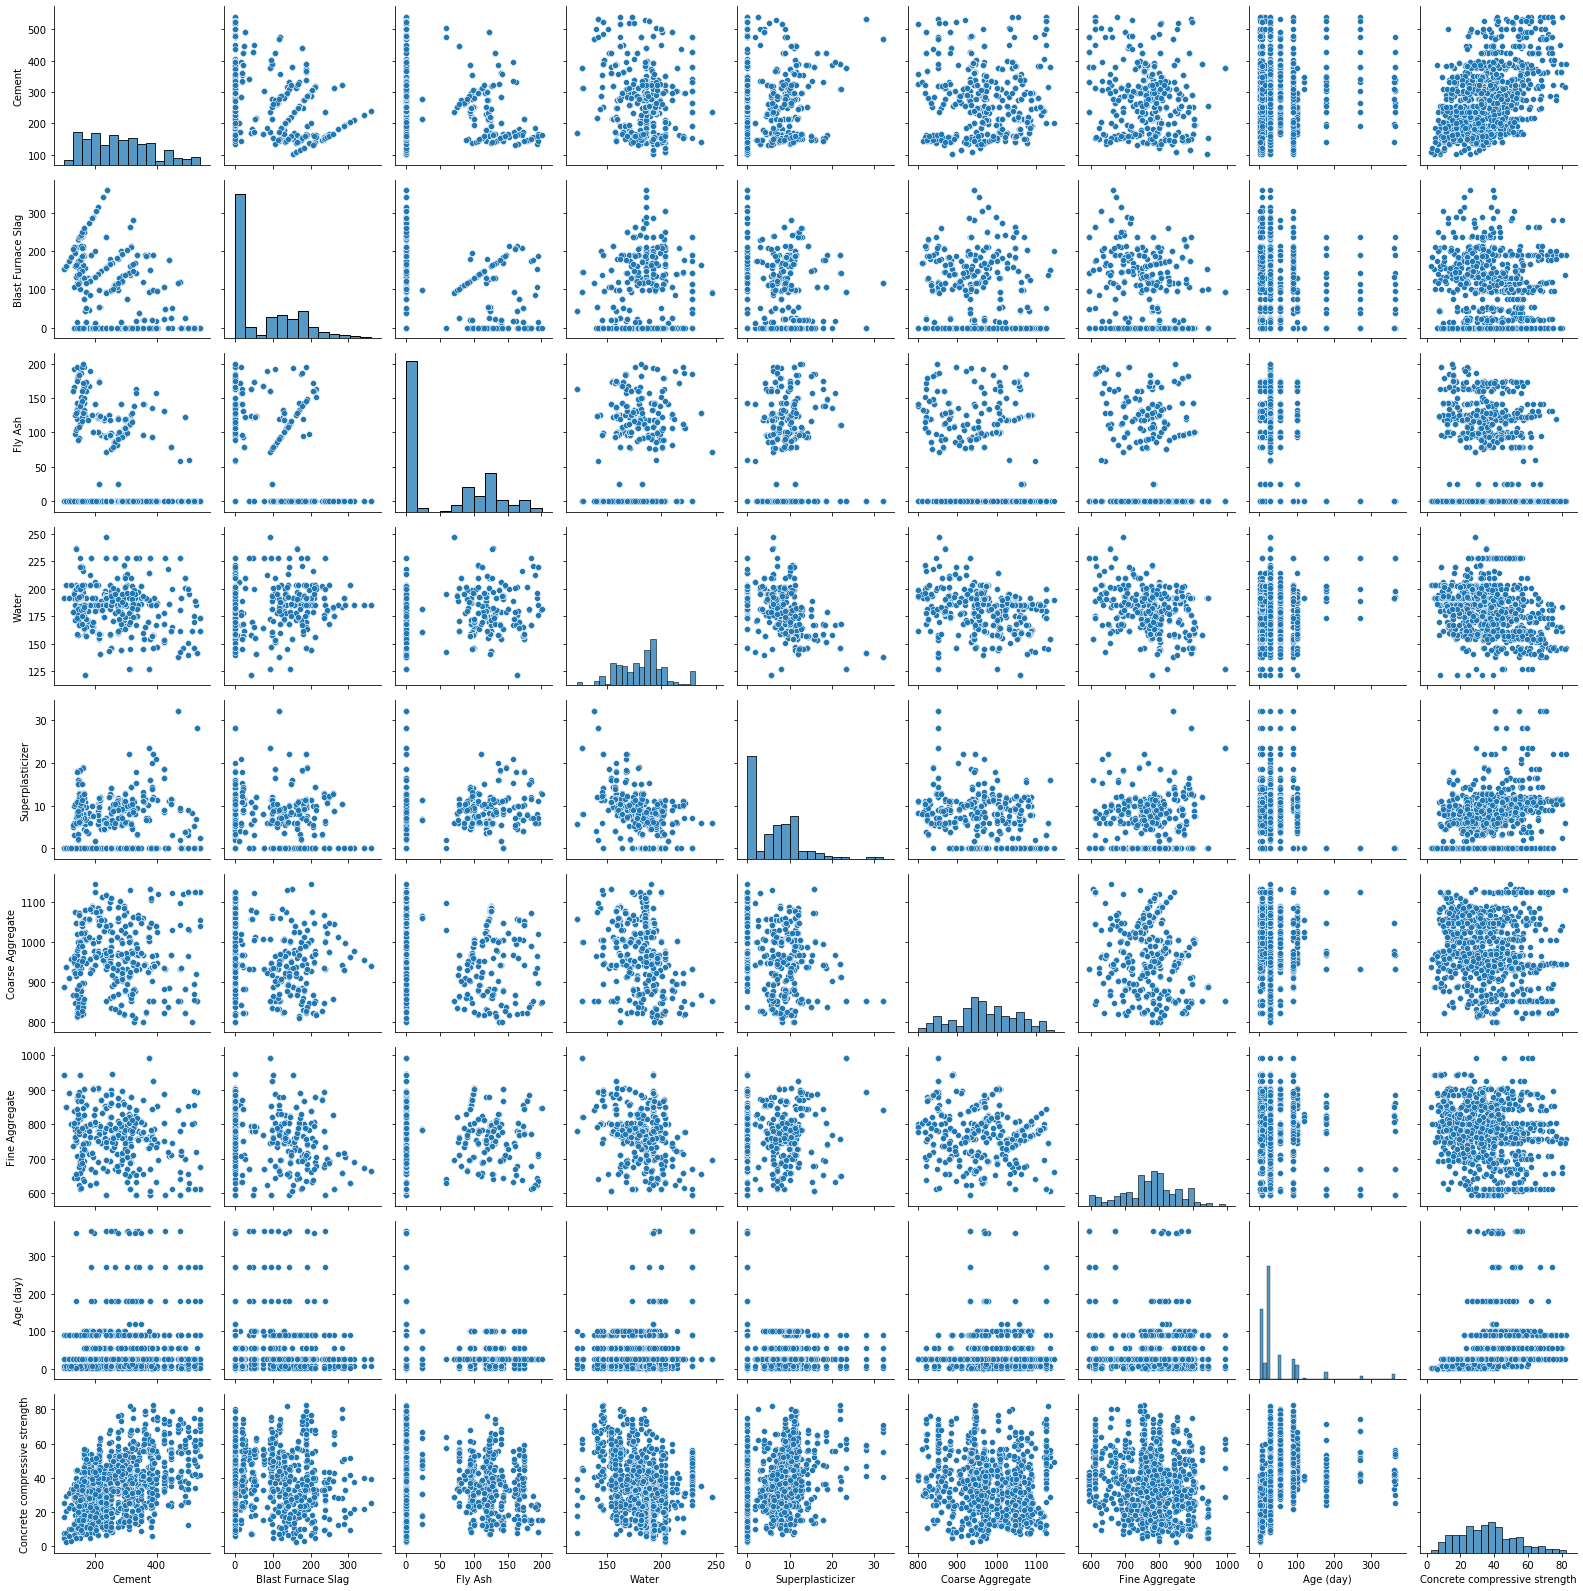

In [24]:
# Compute the correlation matrix
corr_matrix = df.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Reds")
plt.savefig("heatmapconcrete.pdf", bbox_inches="tight")
plt.show()

#pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(df)
plt.savefig("pairplotconcrete.pdf", bbox_inches="tight")
plt.show()

In [6]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1] 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state=0)

# Random Forest
ranf = RandomForestRegressor(random_state=0)
rf = ranf.fit(X_train, y_train)
scores_rf = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

y_pred_rf = cross_val_predict(ranf, X_test, y_test)
scores_test_rf = cross_val_score(ranf, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_rf) * -1)

# Decision Tree
dectree = DecisionTreeRegressor(random_state=0)
dt = dectree.fit(X_train, y_train)
scores_dt = cross_val_score(dt, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)

y_pred_dt = cross_val_predict(dectree, X_test, y_test)
scores_test_dt = cross_val_score(dectree, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_dt) * -1)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = cross_val_predict(knn_model, X_test, y_test)
scores_test_knn = cross_val_score(knn_model, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_knn) * -1)

# Create an XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=0)
scores_xgb = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
y_pred_xgb = cross_val_predict(xgb_reg, X_test, y_test)
scores_test_xgb = cross_val_score(xgb_reg, X_test, y_test, scoring='neg_mean_absolute_error', cv=10)
print(np.mean(scores_test_xgb) * -1)



5.196297720238095
7.171564285714285
9.580137619047617
4.94395495279403


In [9]:
X

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [12]:
X1=X
X1

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [13]:
def normalize(X1):
    result = X1.copy()
    for feature_name in X1.columns:
        max_value = X1[feature_name].max()
        min_value = X1[feature_name].min()
        result[feature_name] = X1[feature_name] / (max_value - min_value)
    return result

X = normalize(X1)
print(X)

        Cement  Blast Furnace Slag   Fly Ash     Water  Superplasticizer  \
0     1.232877            0.000000  0.000000  1.293930          0.077640   
1     1.232877            0.000000  0.000000  1.293930          0.077640   
2     0.759132            0.396494  0.000000  1.821086          0.000000   
3     0.759132            0.396494  0.000000  1.821086          0.000000   
4     0.453425            0.368392  0.000000  1.533546          0.000000   
...        ...                 ...       ...       ...               ...   
1025  0.631050            0.322760  0.451274  1.434505          0.276398   
1026  0.735616            0.000000  0.577711  1.565495          0.322981   
1027  0.339041            0.387869  0.542729  1.539137          0.189441   
1028  0.363242            0.519477  0.000000  1.402556          0.350932   
1029  0.595662            0.279633  0.391304  1.602236          0.267081   

      Coarse Aggregate  Fine Aggregate  Age (day)  
0             3.023256        1.695

/usr/lib/python3/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-14-6385ee0f9feb>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
<ipython-input-14-6385ee0f9feb>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[X_test[col] == val, col] = missing_values[(col, val

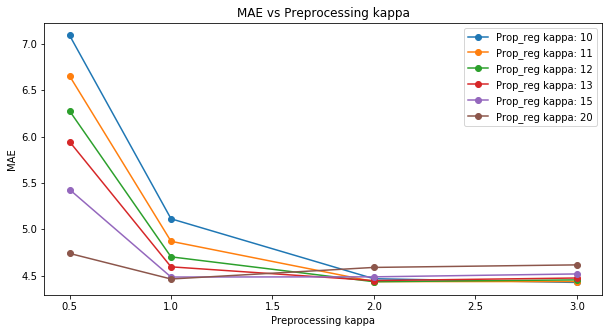

Optimal Preprocessing kappa: 3
Optimal Prop_reg kappa: 10
Minimum MAE: 4.42587500774907


In [14]:
def preprocess_data(X_train, X_test, y_train, kappa, ordinal_columns):
    X_train, X_test = handle_categorical(X_train, X_test, y_train, ordinal_columns)
    X_train, X_test = handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns)
    return X_train, X_test


def handle_categorical(X_train, X_test, y_train, ordinal_columns):
    means = {}

    for col in X_train.columns:
        if col not in ordinal_columns:  # Categorical variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_train:
                mean = y_train[X_train[col] == val].mean()
                means[(col, val)] = mean
                print(f"Column: {col}, Value: {val}, Mean: {mean}")

            for val in unique_values_test:
                if val not in unique_values_train:
                    print(f"Warning: Value {val} in column {col} of X_test is not in X_train.")

    for col, val in means:
        X_train.loc[X_train[col] == val, col] = means[(col, val)]
        X_test.loc[X_test[col] == val, col] = means[(col, val)]

    return X_train, X_test


def handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns):
    missing_values = {}

    for col in X_train.columns:
        if col in ordinal_columns:  # Ordinal variable
            unique_values_train = X_train[col].unique()
            unique_values_test = X_test[col].unique()

            for val in unique_values_test:
                y_train_np = y_train.to_numpy()
                X_train_col_np = X_train[[col]].to_numpy()
                X_test_col_val = val
                l = 0
                v = 0
                for j in range(X_train_col_np.shape[0]):
                    d = abs(X_test_col_val - X_train_col_np[j])
                    l += y_train_np[j] / ((1 + d) ** kappa)
                    v += 1 / ((1 + d) ** kappa)
                imputed_value = l / v
                missing_values[(col, val)] = imputed_value

            for val in unique_values_train:
                if val not in unique_values_test:
                    y_train_np = y_train.to_numpy()
                    X_train_col_np = X_train[[col]].to_numpy()
                    X_train_col_val = val
                    l = 0
                    v = 0
                    for j in range(X_train_col_np.shape[0]):
                        d = abs(X_train_col_val - X_train_col_np[j])
                        l += y_train_np[j] / ((1 + d) ** kappa)
                        v += 1 / ((1 + d) ** kappa)
                    imputed_value = l / v
                    missing_values[(col, val)] = imputed_value

    for col, val in missing_values:
        X_train.loc[X_train[col] == val, col] = missing_values[(col, val)]
        X_test.loc[X_test[col] == val, col] = missing_values[(col, val)]

    return X_train, X_test



def prop_reg(X_test,X_train,y_train,y_test,kappa):
    d = np.zeros((len(X_test),len(X_train)))
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            d[i,j] = np.linalg.norm(X_test[i]-X_train[j])
    c=np.zeros(len(y_test))
    for i in range(len(y_test)):
        l=0
        v=0
        for j in range(len(y_train)):
            
            l+=y_train[j]/((1+d[i,j])**kappa)
            v+=1/((1+d[i,j])**kappa)
        
        c[i]=l/v
    return(c)

def kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    results = {}
    mae_values_per_kappa = {}

    for kappa_preprocessing in kappa_values_preprocessing:
        for kappa_prop_reg in kappa_values_prop_reg:
            mae_values = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                X_train_preprocessed, X_test_preprocessed = preprocess_data(X_train, X_test, y_train, kappa_preprocessing, ordinal_columns)
                y_pred = prop_reg(X_test_preprocessed.values, X_train_preprocessed.values, y_train.values, y_test.values, kappa_prop_reg)
                mae = mean_absolute_error(y_test, y_pred)
                mae_values.append(mae)

            results[(kappa_preprocessing, kappa_prop_reg)] = np.mean(mae_values)
            mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)] = mae_values

    return results, mae_values_per_kappa


ordinal_columns = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age (day)']

kappa_values_preprocessing = [0.5,1,2,3]
kappa_values_prop_reg = [10,11,12,13,15,20]

cv_results, mae_values_per_kappa = kfold_cv(X, y, ordinal_columns, kappa_values_preprocessing, kappa_values_prop_reg)



# Plot the MAE vs kappa curve for preprocessing
plt.figure(figsize=(10, 5))
for kappa_prop_reg in kappa_values_prop_reg:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_preprocessing in kappa_values_preprocessing]
    plt.plot(kappa_values_preprocessing, mae_values, '-o', label=f"Prop_reg kappa: {kappa_prop_reg}")

plt.xlabel('Preprocessing kappa')
plt.ylabel('MAE')
plt.title('MAE vs Preprocessing kappa')
plt.legend()
plt.show()




    # Find the optimal combination of kappa values
optimal_kappa_preprocessing, optimal_kappa_prop_reg = min(cv_results, key=cv_results.get)
optimal_mae = cv_results[(optimal_kappa_preprocessing, optimal_kappa_prop_reg)]

print(f"Optimal Preprocessing kappa: {optimal_kappa_preprocessing}")
print(f"Optimal Prop_reg kappa: {optimal_kappa_prop_reg}")
print(f"Minimum MAE: {optimal_mae}")


In [15]:
# Print all the combinations of kappa values and their corresponding MAE values
print("Kappa combinations and their MAE values:")
for (kappa_preprocessing, kappa_prop_reg), mae in cv_results.items():
    print((kappa_preprocessing, kappa_prop_reg, mae))

# Print all the combinations of kappa values and their corresponding MAE values
print("Prop_reg kappa and their MAE values:")
for (kappa_preprocessing, kappa_prop_reg), mae in cv_results.items():
    print((kappa_prop_reg, mae))

Kappa combinations and their MAE values:
(0.5, 10, 7.0926246150505206)
(0.5, 11, 6.654516929465115)
(0.5, 12, 6.2770662495706935)
(0.5, 13, 5.945125058729864)
(0.5, 15, 5.428776812846406)
(0.5, 20, 4.739065778092404)
(1, 10, 5.112932964429187)
(1, 11, 4.8697956380108405)
(1, 12, 4.70214300028738)
(1, 13, 4.594384475892509)
(1, 15, 4.484348151785917)
(1, 20, 4.463104977110171)
(2, 10, 4.465950596135928)
(2, 11, 4.434868952862923)
(2, 12, 4.433727565076616)
(2, 13, 4.446026232084069)
(2, 15, 4.486411271234778)
(2, 20, 4.588078651397623)
(3, 10, 4.42587500774907)
(3, 11, 4.435782734434538)
(3, 12, 4.4535140468939645)
(3, 13, 4.473809822061214)
(3, 15, 4.517725210701439)
(3, 20, 4.6154875699429345)
Prop_reg kappa and their MAE values:
(10, 7.0926246150505206)
(11, 6.654516929465115)
(12, 6.2770662495706935)
(13, 5.945125058729864)
(15, 5.428776812846406)
(20, 4.739065778092404)
(10, 5.112932964429187)
(11, 4.8697956380108405)
(12, 4.70214300028738)
(13, 4.594384475892509)
(15, 4.4843481517

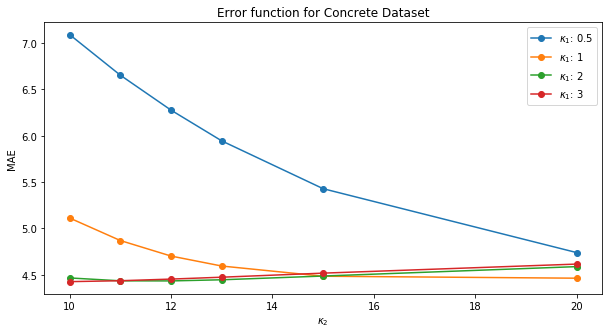

In [17]:
plt.figure(figsize=(10, 5))
for kappa_preprocessing in kappa_values_preprocessing:
    mae_values = [np.mean(mae_values_per_kappa[(kappa_preprocessing, kappa_prop_reg)]) for kappa_prop_reg in kappa_values_prop_reg]
    plt.plot(kappa_values_prop_reg, mae_values, '-o',label=f"$\kappa_1$: {kappa_preprocessing}")

plt.title('Error function for Concrete Dataset')
plt.xlabel('$\kappa_2$')
plt.ylabel('MAE')
plt.legend()
# Save the plot as a PDF
plt.savefig('concrete_full.pdf', bbox_inches='tight')

# Display the plot
plt.show()